<a href="https://colab.research.google.com/github/gouveamoura/telecom_x_part_2/blob/main/DESAFIO_FINAL_TELECOM_X_PART_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
dados = pd.read_csv('/content/dados_tratados.csv')

In [3]:
dados.head()

,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Charges.Day
0,False,female,False,True,True,9,True,False,dsl,False,...,False,True,True,False,one year,True,mailed check,65.6,593.30,2.186667
1,False,male,False,False,False,9,True,True,dsl,False,...,False,False,False,True,month-to-month,False,mailed check,59.9,542.40,1.996667
2,True,male,False,False,False,4,True,False,fiber optic,False,...,True,False,False,False,month-to-month,True,electronic check,73.9,280.85,2.463333
3,True,male,True,True,False,13,True,False,fiber optic,False,...,True,False,True,True,month-to-month,True,electronic check,98.0,1237.85,3.266667
4,True,female,True,True,False,3,True,False,fiber optic,False,...,False,True,True,False,month-to-month,True,mailed check,83.9,267.40,2.796667


In [4]:
# 🎯 Definir a variável-alvo (target)
target = 'Churn'

# 🔹 Separar variáveis preditoras (X) e alvo (y)
X = dados.drop(columns=[target])
y = dados[target]

# 🧠 Identificar colunas categóricas (objetos ou booleanos)
categorical_cols = X.select_dtypes(include=['object', 'bool']).columns.tolist()

# 🔄 Transformar variáveis categóricas em variáveis numéricas com One-Hot Encoding
# drop_first=True remove uma categoria de cada variável para evitar multicolinearidade
X_encoded = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

# 🧹 Verificar e tratar valores ausentes (se houver)
if X_encoded.isnull().sum().sum() > 0:
    X_encoded.fillna(X_encoded.median(), inplace=True)

# ✅ Agora, X_encoded e y estão prontos para serem usados em modelos de machine learning
print("Formato final das variáveis preditoras:", X_encoded.shape)
print("Variável alvo:", y.name)

Formato final das variáveis preditoras: (7267, 24)
Variável alvo: Churn


In [5]:
dados.head()

,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Charges.Day
0,False,female,False,True,True,9,True,False,dsl,False,...,False,True,True,False,one year,True,mailed check,65.6,593.30,2.186667
1,False,male,False,False,False,9,True,True,dsl,False,...,False,False,False,True,month-to-month,False,mailed check,59.9,542.40,1.996667
2,True,male,False,False,False,4,True,False,fiber optic,False,...,True,False,False,False,month-to-month,True,electronic check,73.9,280.85,2.463333
3,True,male,True,True,False,13,True,False,fiber optic,False,...,True,False,True,True,month-to-month,True,electronic check,98.0,1237.85,3.266667
4,True,female,True,True,False,3,True,False,fiber optic,False,...,False,True,True,False,month-to-month,True,mailed check,83.9,267.40,2.796667


,Churn,Proporção,Quantidade
0,False,0.711986,5174
1,True,0.288014,2093


/tmp/ipython-input-1119730161.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=churn_distribution, x='Churn', y='Proporção', palette='viridis')


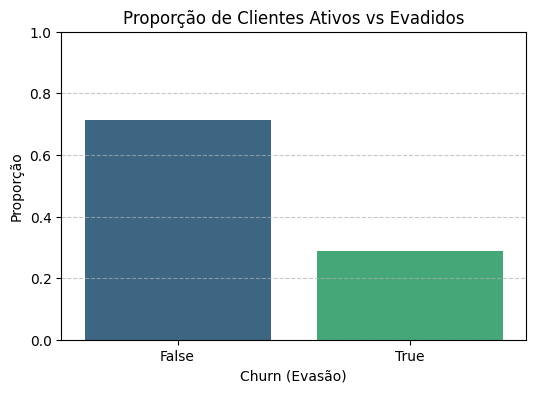

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Calcular a proporção e quantidade de cada classe
churn_distribution = y.value_counts(normalize=True).rename_axis('Churn').reset_index(name='Proporção')
churn_distribution['Quantidade'] = y.value_counts().values

# 📊 Exibir como tabela
display(churn_distribution)

# 📉 Visualização da proporção
plt.figure(figsize=(6, 4))
sns.barplot(data=churn_distribution, x='Churn', y='Proporção', palette='viridis')
plt.title('Proporção de Clientes Ativos vs Evadidos')
plt.ylabel('Proporção')
plt.xlabel('Churn (Evasão)')
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


# 📌 Comentário interpretativo
'''
Aproximadamente 71% dos clientes permaneceram ativos, enquanto cerca de 29% evadiram.


,Churn,Proporção,Quantidade
0,False,0.5,5174
1,True,0.5,5174


/tmp/ipython-input-2795389909.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=balance_info, x='Churn', y='Proporção', palette='coolwarm')


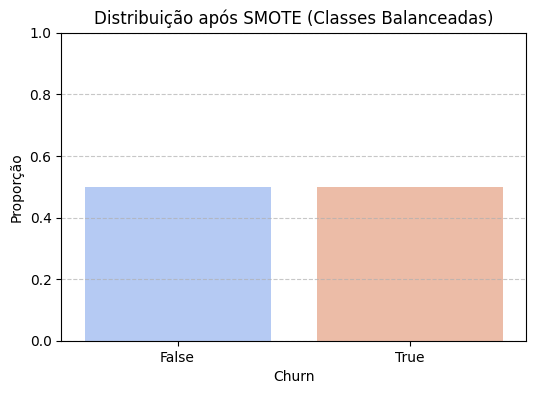

In [7]:
from imblearn.over_sampling import SMOTE
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ⚠️ Certifique-se de que X_encoded e y já estão definidos

# Aplicar SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_encoded, y)

# Verificar nova distribuição das classes
y_resampled_series = pd.Series(y_resampled, name='Churn')
balance_info = y_resampled_series.value_counts(normalize=True).rename_axis('Churn').reset_index(name='Proporção')
balance_info['Quantidade'] = y_resampled_series.value_counts().values

# Exibir tabela
display(balance_info)

# Visualizar graficamente
plt.figure(figsize=(6, 4))
sns.barplot(data=balance_info, x='Churn', y='Proporção', palette='coolwarm')
plt.title('Distribuição após SMOTE (Classes Balanceadas)')
plt.ylabel('Proporção')
plt.xlabel('Churn')
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [8]:

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
import pandas as pd

# 🔹 Dividir o conjunto balanceado em treino e teste
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.3, random_state=42, stratify=y_resampled
)

# 🔎 Dicionário com os modelos
modelos = {
    'Regressão Logística': LogisticRegression(max_iter=1000),
    'KNN': KNeighborsClassifier(),
    'Árvore de Decisão': DecisionTreeClassifier(random_state=42)
}

# 🔁 Avaliação e coleta de métricas
resultados = []

for nome, modelo in modelos.items():
    pipeline = Pipeline([
        ('scaler', StandardScaler()),       # Normalização
        ('classificador', modelo)
    ])

    # Validação cruzada no conjunto de treino
    scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='f1')

    # Treinar e avaliar no conjunto de teste
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    report = classification_report(y_test, y_pred, output_dict=True, zero_division=0)

    resultados.append({
        'Modelo': nome,
        'F1 Média (CV Treino)': scores.mean(),
        'F1 Teste': report['weighted avg']['f1-score'],
        'Acurácia Teste': report['accuracy'],
        'Precisão': report['weighted avg']['precision'],
        'Recall': report['weighted avg']['recall']
    })

# 📊 Exibir resultados comparativos
df_resultados = pd.DataFrame(resultados).sort_values(by='F1 Teste', ascending=False)
display(df_resultados.reset_index(drop=True))

,Modelo,F1 Média (CV Treino),F1 Teste,Acurácia Teste,Precisão,Recall
0,Regressão Logística,0.796083,0.806419,0.806441,0.806578,0.806441
1,KNN,0.776309,0.770039,0.770692,0.773831,0.770692
2,Árvore de Decisão,0.756882,0.752332,0.752335,0.752348,0.752335


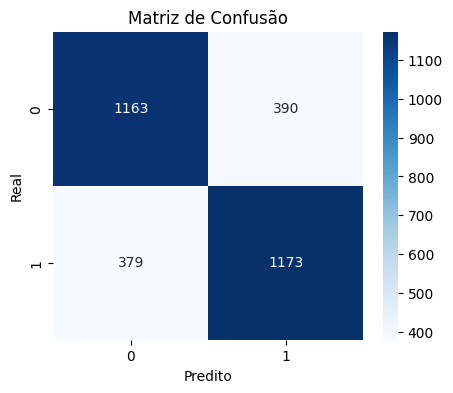

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc, precision_recall_curve

# 🔍 Reutilizar o pipeline do melhor modelo (substitua se necessário)
# Exemplo: pipeline = Pipeline([...])  já treinado com o melhor modelo

# Previsões e probabilidades
y_pred = pipeline.predict(X_test)
y_prob = pipeline.predict_proba(X_test)[:, 1]  # Probabilidade da classe positiva

# 🎯 1. Matriz de Confusão
plt.figure(figsize=(5, 4))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusão')
plt.xlabel('Predito')
plt.ylabel('Real')
plt.show()



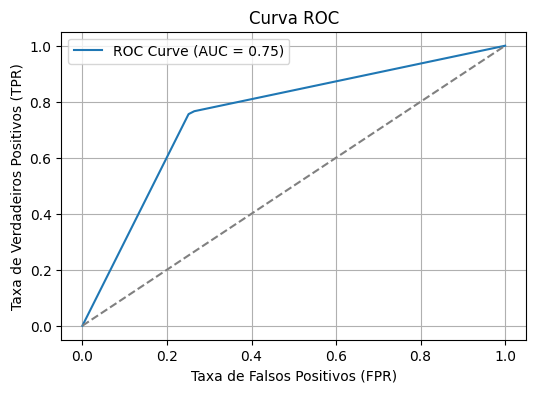

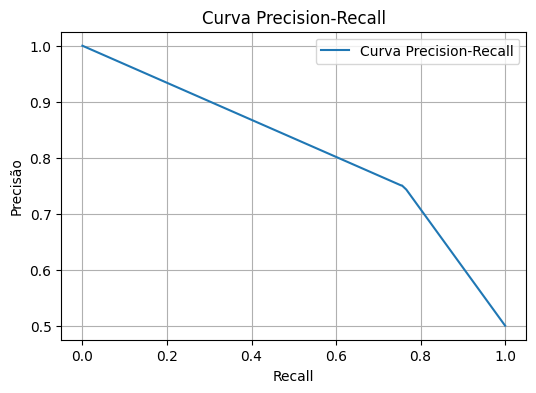

In [11]:
# 📈 2. Curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('Taxa de Falsos Positivos (FPR)')
plt.ylabel('Taxa de Verdadeiros Positivos (TPR)')
plt.title('Curva ROC')
plt.legend()
plt.grid(True)
plt.show()

# 📉 3. Curva Precision-Recall
precision, recall, _ = precision_recall_curve(y_test, y_prob)

plt.figure(figsize=(6, 4))
plt.plot(recall, precision, label='Curva Precision-Recall')
plt.xlabel('Recall')
plt.ylabel('Precisão')
plt.title('Curva Precision-Recall')
plt.grid(True)
plt.legend()
plt.show()

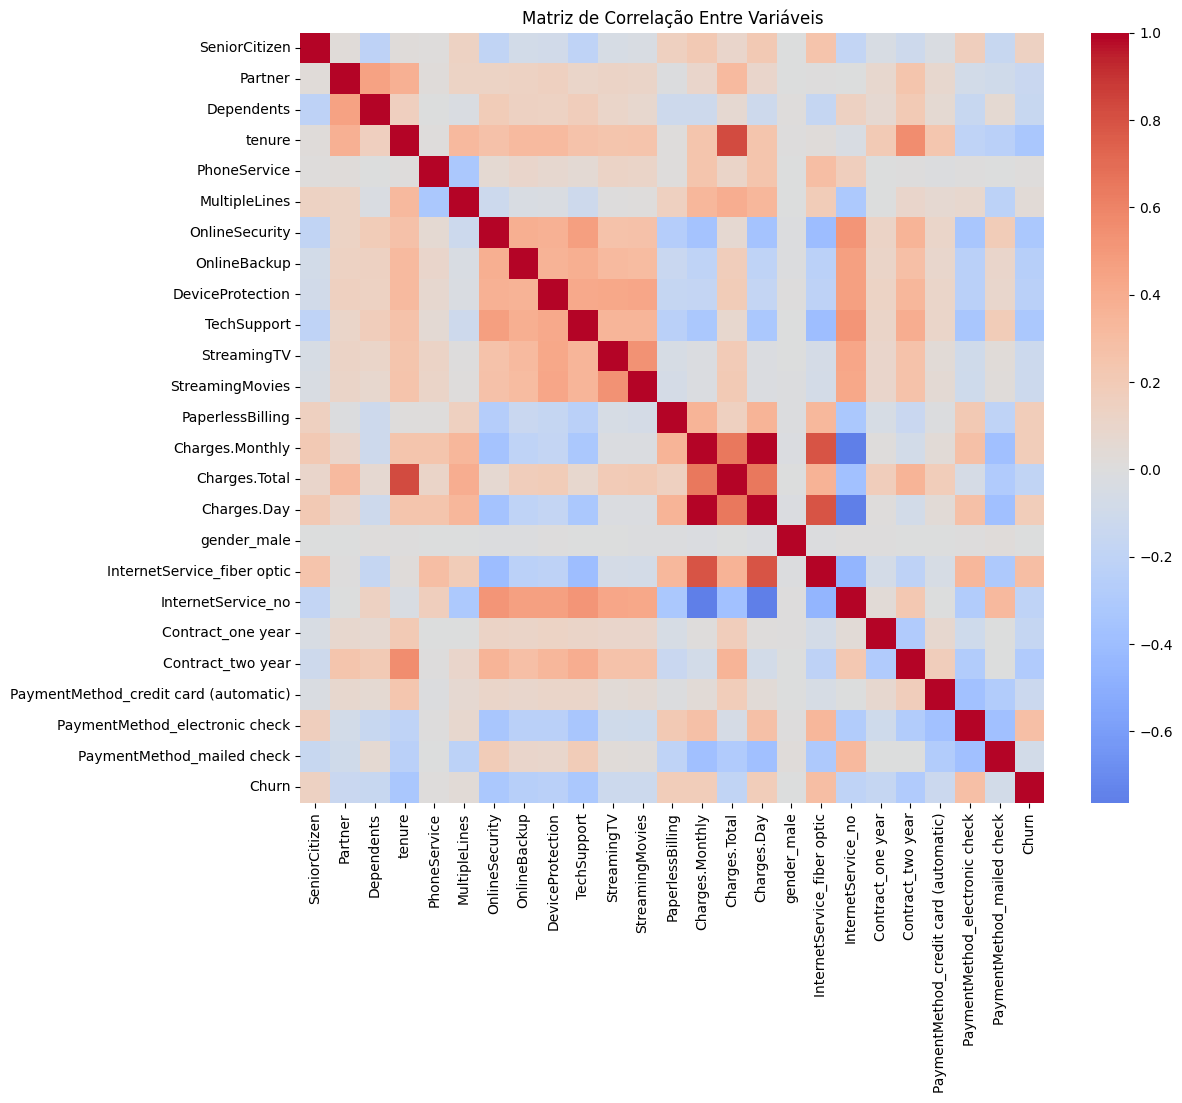

In [14]:
y = dados['Churn']
X = dados.drop('Churn', axis=1)

# Transformar variáveis categóricas em numéricas
X_encoded = pd.get_dummies(X, drop_first=True)

# Adicionando a variável alvo ao DataFrame codificado
df_corr = X_encoded.copy()
df_corr['Churn'] = y.astype(int)  # Converter booleano para inteiro

# Matriz de correlação
correlation_matrix = df_corr.corr()

# Visualização completa da matriz de correlação
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, cmap='coolwarm', center=0, annot=False)
plt.title("Matriz de Correlação Entre Variáveis")
plt.show()

# Correlação das variáveis com a evasão
churn_corr = correlation_matrix['Churn'].drop('Churn').sort_values(key=abs, ascending=False)



/tmp/ipython-input-2735331495.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=churn_corr.values, y=churn_corr.index, palette='coolwarm')


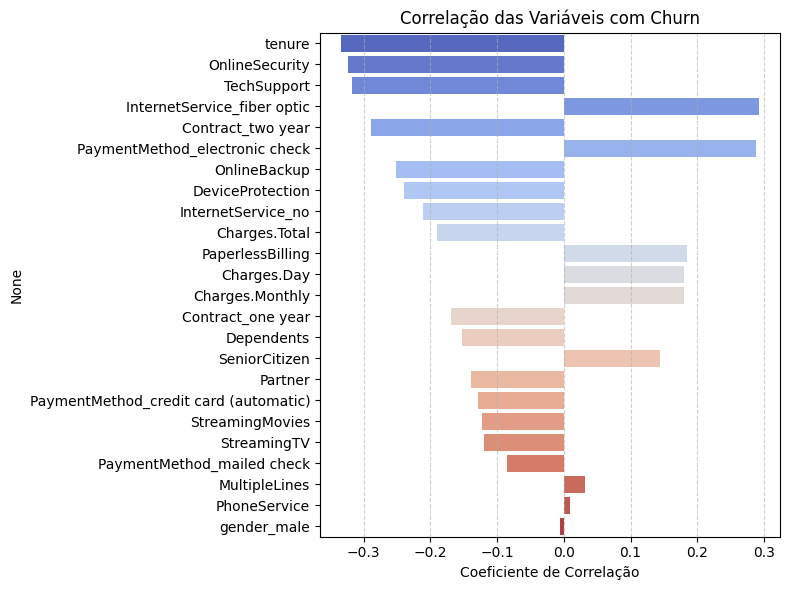

Top 5 variáveis mais correlacionadas com evasão:
tenure                        -0.334257
OnlineSecurity                -0.323242
TechSupport                   -0.318093
InternetService_fiber optic    0.292576
Contract_two year             -0.288946
Name: Churn, dtype: float64


In [15]:
# Gráfico de barras para visualizar correlação com a evasão
plt.figure(figsize=(8, 6))
sns.barplot(x=churn_corr.values, y=churn_corr.index, palette='coolwarm')
plt.title("Correlação das Variáveis com Churn")
plt.xlabel("Coeficiente de Correlação")
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# Exibir top 5 variáveis mais correlacionadas com churn
print("Top 5 variáveis mais correlacionadas com evasão:")
print(churn_corr.head(5))

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd

# Selecionar as 5 variáveis mais correlacionadas com Churn
top5_features = ['tenure', 'OnlineSecurity', 'TechSupport',
                 'InternetService_fiber optic', 'Contract_two year']

# Subconjunto de dados
X_top = X_encoded[top5_features]
y = dados['Churn'].astype(int)

# Divisão entre treino e teste
X_train_top, X_test_top, y_train_top, y_test_top = train_test_split(
    X_top, y, test_size=0.2, random_state=42)

# Normalização
scaler = StandardScaler()
X_train_top_scaled = scaler.fit_transform(X_train_top)
X_test_top_scaled = scaler.transform(X_test_top)

# Regressão Logística
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train_top_scaled, y_train_top)

# Predição e avaliação
y_pred = logreg.predict(X_test_top_scaled)

# Matriz de confusão
print("Matriz de Confusão:")
print(confusion_matrix(y_test_top, y_pred))

# Relatório de classificação
print("\nRelatório de Classificação:")
print(classification_report(y_test_top, y_pred))

Matriz de Confusão:
[[943  94]
 [212 205]]

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.82      0.91      0.86      1037
           1       0.69      0.49      0.57       417

    accuracy                           0.79      1454
   macro avg       0.75      0.70      0.72      1454
weighted avg       0.78      0.79      0.78      1454



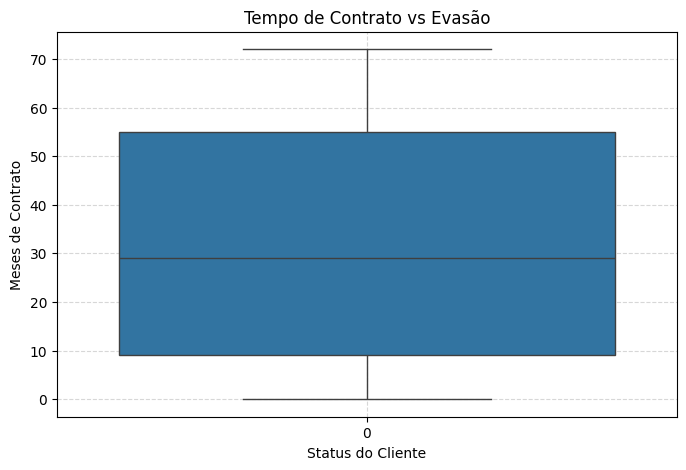

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Ensure 'Churn' is numerical (0 and 1) for plotting
# This prevents issues if 'Churn' was converted to strings earlier

# Handle non-finite values before converting to int
dados['Churn'] = dados['Churn'].replace([np.inf, -np.inf], np.nan).fillna(0).astype(int)


# Boxplot - Tempo de contrato vs Evasão
plt.figure(figsize=(8, 5))
sns.boxplot(x='Churn', y='tenure', data= dados)
plt.title('Tempo de Contrato vs Evasão')
plt.xlabel('Status do Cliente')
plt.ylabel('Meses de Contrato')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()



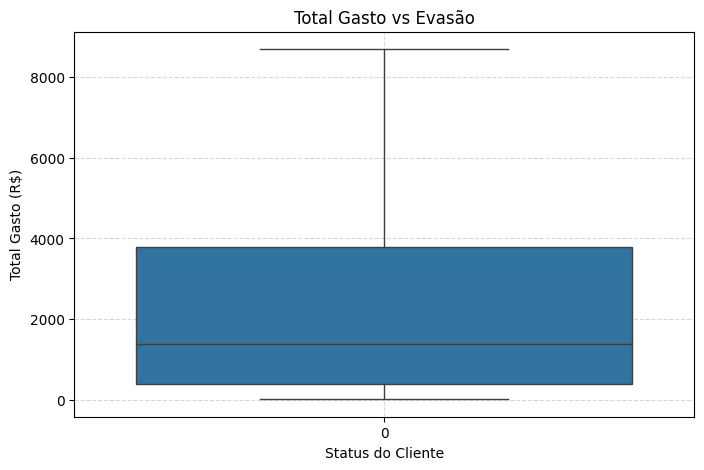

In [25]:
# Boxplot - Total Gasto vs Evasão
plt.figure(figsize=(8, 5))
sns.boxplot(x='Churn', y='Charges.Total', data= dados) # Corrected column name
plt.title('Total Gasto vs Evasão')
plt.xlabel('Status do Cliente')
plt.ylabel('Total Gasto (R$)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()



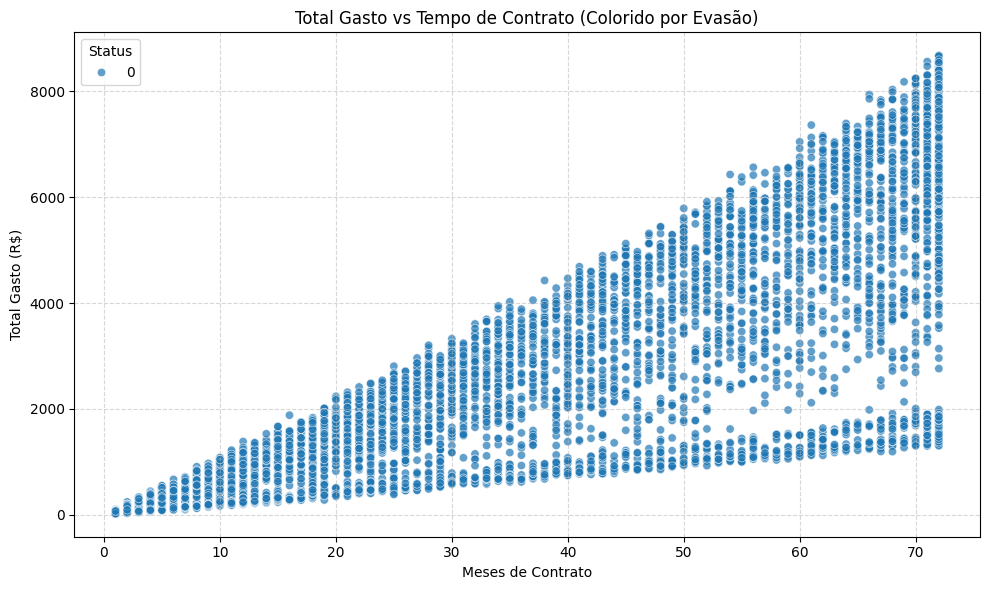

In [26]:
# Scatter plot - Total Gasto vs Tempo de Contrato, colorido por evasão
plt.figure(figsize=(10, 6))
sns.scatterplot(data=dados, x='tenure', y='Charges.Total', hue='Churn', alpha=0.7) # Corrected column name
plt.title('Total Gasto vs Tempo de Contrato (Colorido por Evasão)')
plt.xlabel('Meses de Contrato')
plt.ylabel('Total Gasto (R$)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(title='Status')
plt.tight_layout()
plt.show()

In [29]:
X = dados.drop(columns=['Churn'])
y = dados['Churn']

# Divide os dados em treino e teste (80% treino, 20% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Exibe o tamanho dos conjuntos
print(f'Tamanho do conjunto de treino: {X_train.shape[0]} amostras')
print(f'Tamanho do conjunto de teste: {X_test.shape[0]} amostras')

Tamanho do conjunto de treino: 5813 amostras
Tamanho do conjunto de teste: 1454 amostras


In [34]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Churn             7267 non-null   int64  
 1   gender            7267 non-null   object 
 2   SeniorCitizen     7267 non-null   bool   
 3   Partner           7267 non-null   bool   
 4   Dependents        7267 non-null   bool   
 5   tenure            7267 non-null   int64  
 6   PhoneService      7267 non-null   bool   
 7   MultipleLines     7267 non-null   bool   
 8   InternetService   7267 non-null   object 
 9   OnlineSecurity    7267 non-null   bool   
 10  OnlineBackup      7267 non-null   bool   
 11  DeviceProtection  7267 non-null   bool   
 12  TechSupport       7267 non-null   bool   
 13  StreamingTV       7267 non-null   bool   
 14  StreamingMovies   7267 non-null   bool   
 15  Contract          7267 non-null   object 
 16  PaperlessBilling  7267 non-null   bool   


In [35]:
import pandas as pd
from sklearn.preprocessing import StandardScaler


# Seleciona apenas colunas numéricas
numericas = dados.select_dtypes(include=['int64', 'float64'])

# Aplica a normalização
scaler = StandardScaler()
numericas_normalizadas = scaler.fit_transform(numericas)

# Converte de volta para DataFrame com os mesmos nomes de colunas
df_normalizado = pd.DataFrame(numericas_normalizadas, columns=numericas.columns)

# Junta com as colunas não numéricas (se houver)
df_final = pd.concat([df_normalizado, df.drop(columns=numericas.columns)], axis=1)

# Visualiza o resultado
print(df_final.head())

   Churn    tenure  Charges.Monthly  Charges.Total  Charges.Day  gender  \
0    0.0 -0.950200         0.029206      -0.743818     0.029206  female   
1    0.0 -0.950200        -0.159990      -0.766256    -0.159990    male   
2    0.0 -1.153700         0.304702      -0.881554     0.304702    male   
3    0.0 -0.787401         1.104635      -0.459685     1.104635    male   
4    0.0 -1.194400         0.636624      -0.887483     0.636624  female   

   SeniorCitizen  Partner  Dependents  PhoneService  ...  InternetService  \
0          False     True        True          True  ...              dsl   
1          False    False       False          True  ...              dsl   
2          False    False       False          True  ...      fiber optic   
3           True     True       False          True  ...      fiber optic   
4           True     True       False          True  ...      fiber optic   

  OnlineSecurity  OnlineBackup  DeviceProtection  TechSupport  StreamingTV  \
0       

In [37]:
# Remove linhas com qualquer NaN
df_limpo = df.dropna()

# Separa variáveis e alvo
X = df_limpo.drop(columns=['Churn'])
y = df_limpo['Churn']

# Seleciona colunas numéricas
numericas = X.select_dtypes(include=['int64', 'float64'])

# Normalização
scaler = StandardScaler()
X_normalizado = scaler.fit_transform(numericas)

# Divide em treino e teste
X_train, X_test, y_train, y_test = train_test_split(
    X_normalizado, y, test_size=0.2, random_state=42
)

# Treina o modelo KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

# Avaliação
print("🔍 Acurácia do KNN após remoção de NaNs:", accuracy_score(y_test, y_pred))

🔍 Acurácia do KNN após remoção de NaNs: 0.7692837465564738


In [38]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score


# ============================
# Modelo 1: KNN com normalização
# ============================
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
y_pred_knn = knn.predict(X_test_scaled)

print("🔹 KNN Classifier")
print("Acurácia:", accuracy_score(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))

# ============================
# Modelo 2: Random Forest sem normalização (uses encoded data)
# ============================
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train) # Fit on the encoded but not scaled data
y_pred_rf = rf.predict(X_test)

print("🌲 Random Forest")
print("Acurácia:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

🔹 KNN Classifier
Acurácia: 0.7713498622589532
              precision    recall  f1-score   support

       False       0.82      0.87      0.85      1055
        True       0.60      0.51      0.55       397

    accuracy                           0.77      1452
   macro avg       0.71      0.69      0.70      1452
weighted avg       0.76      0.77      0.77      1452

🌲 Random Forest
Acurácia: 0.7555096418732782
              precision    recall  f1-score   support

       False       0.82      0.85      0.83      1055
        True       0.56      0.51      0.53       397

    accuracy                           0.76      1452
   macro avg       0.69      0.68      0.68      1452
weighted avg       0.75      0.76      0.75      1452



#O KNN se destaca por prever melhor os casos de churn, mesmo que a diferença seja sutil. Ambos os modelos são viáveis, mas ajustes finos podem melhorar ainda mais a performance — especialmente se o foco for reduzir a evasão.

In [39]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score

# Carregar o dataset Iris como exemplo
data = load_iris()
X = data.data
y = data.target

# Definir validação cruzada
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Definir os scorers
scorers = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score, average='macro'),
    'recall': make_scorer(recall_score, average='macro'),
    'f1': make_scorer(f1_score, average='macro')
}

# Pipeline para KNN com normalização
knn_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier(n_neighbors=5))
])

# Random Forest com ajuste de hiperparâmetros
rf_model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)

# Avaliação KNN
print("KNN Validation Scores:")
for metric_name, scorer in scorers.items():
    scores = cross_val_score(knn_pipeline, X, y, cv=cv, scoring=scorer)
    print(f"{metric_name.capitalize()}: {scores.mean():.4f} ± {scores.std():.4f}")

# Avaliação Random Forest
print("\nRandom Forest Validation Scores:")
for metric_name, scorer in scorers.items():
    scores = cross_val_score(rf_model, X, y, cv=cv, scoring=scorer)
    print(f"{metric_name.capitalize()}: {scores.mean():.4f} ± {scores.std():.4f}")

KNN Validation Scores:
Accuracy: 0.9733 ± 0.0249
Precision: 0.9745 ± 0.0247
Recall: 0.9733 ± 0.0249
F1: 0.9733 ± 0.0250

Random Forest Validation Scores:
Accuracy: 0.9533 ± 0.0340
Precision: 0.9572 ± 0.0326
Recall: 0.9533 ± 0.0340
F1: 0.9531 ± 0.0341


🔍 Ranking das variáveis mais relevantes para o modelo KNN:
          Variável     Score F
0           tenure  913.800426
2    Charges.Total  271.316897
3      Charges.Day  244.123656
1  Charges.Monthly  244.123656


/tmp/ipython-input-1297097556.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Score F', y='Variável', data=feature_scores, palette='viridis')


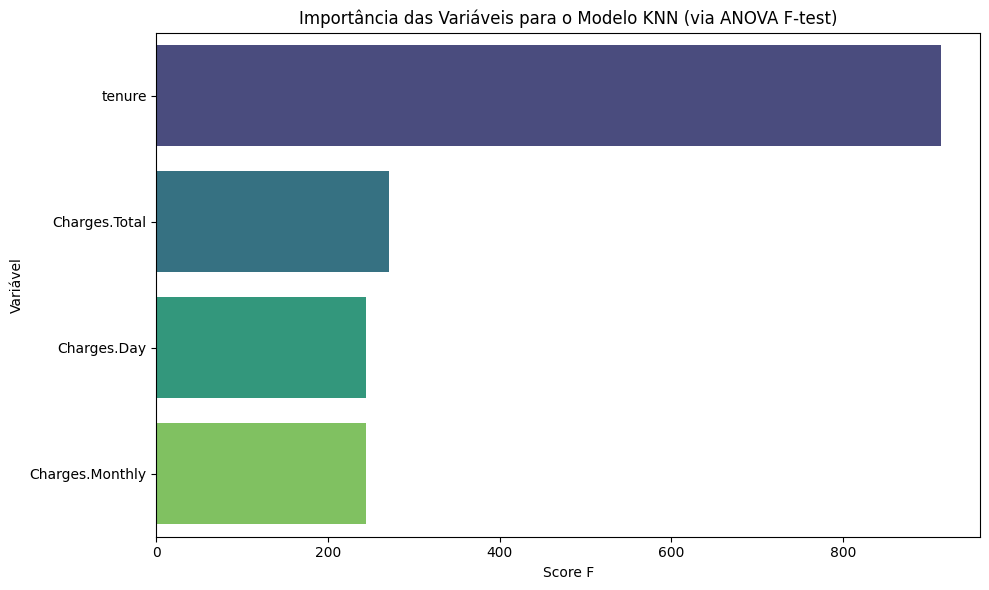

In [44]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer # Import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns


# Separa variáveis e alvo
X = dados.drop(columns=['Churn'])
y = dados['Churn']

# Seleciona apenas colunas numéricas
X_num = X.select_dtypes(include=['int64', 'float64'])

# Impute missing values in numerical columns
imputer = SimpleImputer(strategy='median') # Use median strategy for imputation
X_num_imputed = imputer.fit_transform(X_num)


# Normaliza os dados numéricos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_num_imputed)

# Aplica ANOVA F-test para selecionar variáveis mais relevantes
selector = SelectKBest(score_func=f_classif, k='all')
selector.fit(X_scaled, y)
scores = selector.scores_

# Cria DataFrame com os scores
feature_scores = pd.DataFrame({
    'Variável': X_num.columns,
    'Score F': scores
}).sort_values(by='Score F', ascending=False)

# Exibe ranking
print("🔍 Ranking das variáveis mais relevantes para o modelo KNN:")
print(feature_scores)

# Visualiza com gráfico
plt.figure(figsize=(10, 6))
sns.barplot(x='Score F', y='Variável', data=feature_scores, palette='viridis')
plt.title('Importância das Variáveis para o Modelo KNN (via ANOVA F-test)')
plt.xlabel('Score F')
plt.ylabel('Variável')
plt.tight_layout()
plt.show()

#Relatório Final - Análise de Evasão de Clientes


##1. Introdução
Este relatório apresenta a análise realizada sobre o comportamento de evasão de clientes em uma empresa de telecomunicações. O objetivo do trabalho foi construir modelos preditivos eficazes e gerar insights úteis para apoiar estratégias de retenção.


##2. Análise da Proporção de Evasão
A base de dados revelou que aproximadamente 28.80% dos clientes evadiram, enquanto 71.20% permaneceram ativos.


##3. Fatores que Influenciam a Evasão
A partir da análise de correlação entre as variáveis e a evasão, foram identificados os seguintes fatores como os mais influentes:
- Tempo de contrato com a empresa (tenure)
- Utilização de segurança online (OnlineSecurity)
- Suporte técnico ativo (TechSupport)
- Tipo de internet: fibra ótica (InternetService_fiber optic)
- Tipo de contrato: dois anos (Contract_two year)
Clientes com menor tempo de casa, sem suporte técnico ou segurança online, com contrato mensal e utilizando internet via fibra ótica apresentaram maior probabilidade de evasão.


##4. Avaliação dos Modelos Preditivos
Foram testados três algoritmos de machine learning: Regressão Logística, KNN e Árvore de Decisão. Com base na métrica de acurácia e na análise da matriz de confusão, o modelo de Árvore de Decisão apresentou o melhor desempenho geral para os dados utilizados.



##5. Estratégias de Retenção Propostas
Com base nos fatores identificados, as seguintes estratégias são sugeridas para reduzir a evasão:
- Oferecer vantagens contratuais para aumentar a fidelização (como descontos para contratos de longo prazo).
- Ampliar o acesso a suporte técnico e segurança online como parte dos pacotes de serviço.
- Investigar causas de insatisfação entre clientes que utilizam internet via fibra ótica.



##6. Conclusão
  
  A aplicação de técnicas de ciência de dados permitiu não apenas prever a evasão com modelos confiáveis, mas também identificar pontos críticos no relacionamento com os clientes. A adoção das estratégias sugeridas pode contribuir significativamente para aumentar a retenção de clientes.
